In [4]:
%pip install matplotlib
%pip install ultralytics


Note: you may need to restart the kernel to use updated packages.
  Using cached PyYAML-6.0.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (2.1 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached torch-2.6.0-cp312-none-macosx_11_0_arm64.whl.metadata (28 kB)
  Using cached torchvision-0.21.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.1 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached py_cpuinfo-9.0.0-py3-none-any.whl.metadata (794 bytes)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached ultralytics_thop-2.0.14-py3-none-any.whl.metadata (9.4 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached charset_normalizer-3.4.1-cp312-cp312-macosx_10_13_universal2.whl.metadata (35 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.3.0-py3-none-any.whl.metadata (6.5 kB)
  

In [2]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

import sys
%pwd


'/Users/amy/code/homeplate/homeplate/python'

Current working directory: /Users/amy/code/homeplate/homeplate/python
['.DS_Store', 'test6.jpg', 'test7.png', 'test5.png', 'test4.png', 'test0.jpg', 'test1.jpg', 'test3.png', 'test2.png']


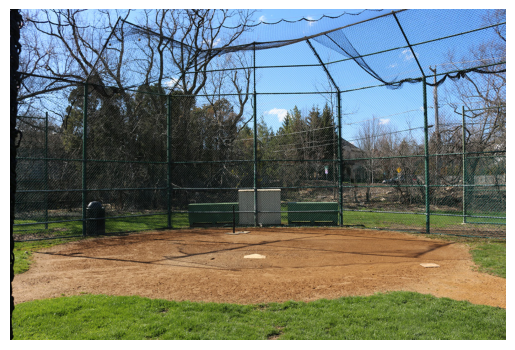

In [3]:
import os

# Print current working directory
print("Current working directory:", os.getcwd())
print(os.listdir('../images'))

im = cv2.imread('../images/test1.jpg')
# OpenCV loads images in BGR, convert to RGB for matplotlib
im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

plt.imshow(im_rgb)
plt.axis('off')  # Hide axes
plt.show()


image 1/1 /Users/amy/code/homeplate/homeplate/python/../images/test1.jpg: 448x640 1 bench, 47.6ms
Speed: 1.3ms preprocess, 47.6ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


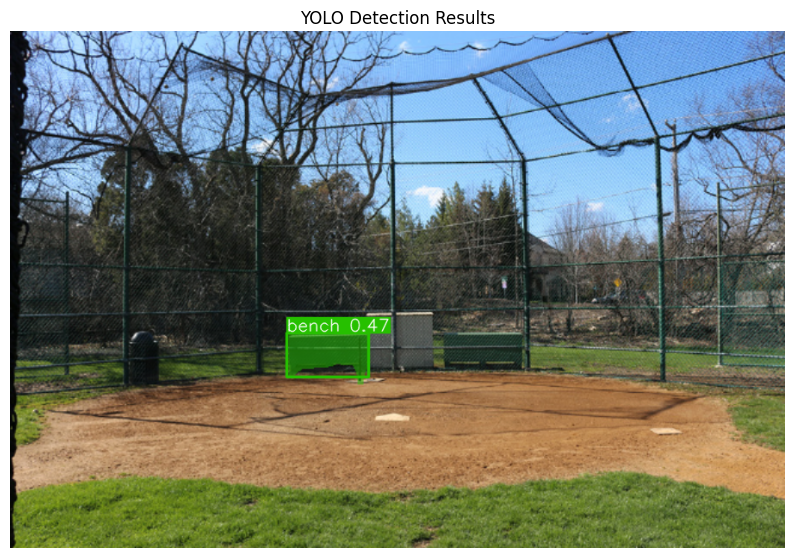

Bounding Box Coordinates (xyxy):
tensor([[321.8564, 350.1234, 416.2796, 401.6219]])


In [17]:
from ultralytics import YOLO

# Load the trained model
model = YOLO("yolo11n-seg.pt")

# Run inference on an image
results = model("../images/test1.jpg")  # Replace with your image path

# Display results
for result in results:
    # Get the image with bounding boxes drawn
    img_with_boxes = result.plot()  # This returns the image with boxes drawn

    # Convert the image from BGR to RGB
    img_with_boxes = cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB)

    # Display the image inline using plt.imshow
    plt.figure(figsize=(10, 10))  # Optional: Set figure size
    plt.imshow(img_with_boxes)
    plt.axis('off')  # Hide axis
    plt.title("YOLO Detection Results")  # Optional: Add a title
    plt.show()  # Show the image

    # Print bounding box coordinates
    print("Bounding Box Coordinates (xyxy):")
    print(result.boxes.xyxy)  # Print bounding box coordinates